# Data Science Capstone Project

### Mauricio Bustos

In this project, the objective is to find what kind of new small business is a good opportunity and where to locate it.

The research will be made based under the concept that the nears of subway stations are good places to locate small businesses due to the high transit of people.

The hypothesis is that the venues around subwaty stations in a consolidated city could give valuable information for a growing city.

We will find the most frequent venues around the subway stations in New York (the consolidated city) and look for differences with the actual venues of Santiago de Chile (the growing city). If we find lacks of some kind of venues in Santiago respect to NYC, we will consider it as a potential new business to grow.

In [1]:
# First let's import the required libraries

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

!pip install geopy
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

! pip install folium==0.5.0
import folium

print('\n','Libraries imported')


 Libraries imported


## 1. Download and explore the dataset

We need the geographical location of all subway stations in NYC and in Santiago. In the case of Santiago we also need the coordinates of the future stations since the network is still growing.

The info was found on the web for both cities in the following URLs.

In [2]:
# Data from NYC subway stations (updated Aug 2019)
url = 'http://web.mta.info/developers/data/nyct/subway/Stations.csv'
df_NYC = pd.read_csv(url)
print('Data of NYC downloaded!')

Data of NYC downloaded!


In [3]:
df_NYC.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Notes
0,1,1,R01,BMT,Astoria,Astoria-Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan,0,NaN
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan,1,NaN
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan,0,NaN
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan,0,NaN
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan,0,NaN


In [4]:
print('We found', df_NYC.shape[0], 'stations in NYC')

We found 496 stations in NYC


Let's see how it looks on a map

In [5]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="Subway_explorer")
NYClocation = geolocator.geocode(address)
NYClatitude = NYClocation.latitude
NYClongitude = NYClocation.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(NYClatitude, NYClongitude))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


In [6]:
# create map of New York using latitude and longitude values
map_nyc = folium.Map(location=[NYClatitude, NYClongitude], zoom_start=11)

# add markers to map
for lat, lon, station in zip(df_NYC['GTFS Latitude'], df_NYC['GTFS Longitude'], df_NYC['Stop Name']):
    label = '{}'.format(station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nyc)  
    
map_nyc

Great. Now let's download the data for the Santiago subway stations (Metro)

In [7]:
# Data for Metro de Santiago stations
url = 'https://opendata.arcgis.com/datasets/cc2e1d8419e64c7cb9502c58c00ba33b_0.csv'
df_Metro = pd.read_csv(url)
print('Data of Metro de Santiago Downloaded')

Data of Metro de Santiago Downloaded


In [8]:
df_Metro.head()

,X,Y,FID,objectid,id,especial,estacion,nombre,temporal,f1,tipo,linea
0,-70.723289,-33.444190,1,1,1,EXISTENTE INTERMODAL,EXISTENTE,SAN PABLO,INTERMODAL,1,ESTACION METRO,Linea 1
1,-70.722538,-33.451933,2,2,2,EXISTENTE,EXISTENTE,NEPTUNO,NaN,1,ESTACION METRO,Linea 1
2,-70.713403,-33.457826,3,3,3,EXISTENTE INTERMODAL,EXISTENTE,PAJARITOS,INTERMODAL,1,ESTACION METRO,Linea 1
3,-70.706475,-33.457238,4,4,4,EXISTENTE,EXISTENTE,LAS REJAS,NaN,1,ESTACION METRO,Linea 1
4,-70.680073,-33.440344,5,5,5,CONSTRUCCION INTERMODAL,CONSTRUCCION,QUINTA NORMAL,INTERMODAL,1,ESTACION METRO,Linea 5


In [9]:
print('We found', df_Metro.shape[0], 'stations in Metro de Santiago')

We found 117 stations in Metro de Santiago


In [10]:
# Renaming some columns
df_Metro.rename(columns={'X':'Longitud', 'Y':'Latitud', 'nombre':'Nombre'}, inplace=True)
df_Metro.head()

,Longitud,Latitud,FID,objectid,id,especial,estacion,Nombre,temporal,f1,tipo,linea
0,-70.723289,-33.444190,1,1,1,EXISTENTE INTERMODAL,EXISTENTE,SAN PABLO,INTERMODAL,1,ESTACION METRO,Linea 1
1,-70.722538,-33.451933,2,2,2,EXISTENTE,EXISTENTE,NEPTUNO,NaN,1,ESTACION METRO,Linea 1
2,-70.713403,-33.457826,3,3,3,EXISTENTE INTERMODAL,EXISTENTE,PAJARITOS,INTERMODAL,1,ESTACION METRO,Linea 1
3,-70.706475,-33.457238,4,4,4,EXISTENTE,EXISTENTE,LAS REJAS,NaN,1,ESTACION METRO,Linea 1
4,-70.680073,-33.440344,5,5,5,CONSTRUCCION INTERMODAL,CONSTRUCCION,QUINTA NORMAL,INTERMODAL,1,ESTACION METRO,Linea 5


Let's see how it looks on a map

In [11]:
address = 'Santiago, Chile'

geolocator = Nominatim(user_agent="Stgo_explorer")
Stgolocation = geolocator.geocode(address)
Stgolatitude = Stgolocation.latitude
Stgolongitude = Stgolocation.longitude
print('The geograpical coordinates of Santiago are {}, {}.'.format(Stgolatitude, Stgolongitude))

The geograpical coordinates of Santiago are -33.4377756, -70.6504502.


In [12]:
# create map of Santiago using latitude and longitude values
map_santiago = folium.Map(location=[Stgolatitude, Stgolongitude], zoom_start=11)

# add markers to map
for lat, lon, estacion in zip(df_Metro['Latitud'], df_Metro['Longitud'], df_Metro['Nombre']):
    label = '{}'.format(estacion)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_santiago)  
    
map_santiago

Good. Now that we have the coordinates of each station of the NYC subway and from the Metro de Santiago, we can get the venues around each station from Foursquare for both cities.

As our focus is to study on consumers as pedestrians, let´s consider a radius of 150 meters around each station.

In [13]:
CLIENT_ID = 'Y3SYHPXWVYFBN3JQX3NYNFECULGRIOTTAVTD0ZJF4B1ZJXOI'
CLIENT_SECRET = '5M3STYAIHNIBEONY5USRSZE3JP1RVAM3K4EJFZNV0MU3EHZ0' # will be changed after the publication on GitHub
VERSION = '20180605'

Now let's get the Foursquare info for Metro de Santiago. Try first with one station, the first in the dataset.

In [14]:
print('Station to try is',df_Metro.loc[0, 'Nombre'])

Station to try is SAN PABLO


In [15]:
station_latitude = df_Metro.loc[0, 'Latitud']
station_longitude = df_Metro.loc[0, 'Longitud']

station_name = df_Metro.loc[0, 'Nombre']

print('Latitude and Longitude values of {} are {}, {}.'.format(station_name, 
                                                               station_latitude, 
                                                               station_longitude))

Latitude and Longitude values of SAN PABLO are -33.4441895493096, -70.7232885295238.


Let's get from Foursquare the venues around 150 m of the San Pablo station.

In [16]:
LIMIT = 100
radius = 150
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    station_latitude, 
    station_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=Y3SYHPXWVYFBN3JQX3NYNFECULGRIOTTAVTD0ZJF4B1ZJXOI&client_secret=5M3STYAIHNIBEONY5USRSZE3JP1RVAM3K4EJFZNV0MU3EHZ0&v=20180605&ll=-33.4441895493096,-70.7232885295238&radius=150&limit=100'

In [17]:
results = requests.get(url).json()

Let's see what we have from Foursquare (we'll use the venue id later, so it is included in the dataframe)

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.id', 'venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,id,name,categories,lat,lng
0,4ec306ade300690dcbb25d85,Ahí Sushi,Sushi Restaurant,-33.443676,-70.723286
1,4d5bc15e1ef2f04dea37edcd,Spacio1,Convenience Store,-33.444496,-70.723931
2,4c4b257b46240f47937ceef2,Pollos Asados A Las Brasas Las Cañas,Wings Joint,-33.443959,-70.723401
3,4e07e599b3ad23ff53ffe141,China Popular,Chinese Restaurant,-33.444355,-70.724579
4,521175e68bbd917db524e8a4,Salcobrand,Pharmacy,-33.444200,-70.722973


In [20]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

7 venues were returned by Foursquare.


So far so good. Now let's get the info for all the Metro stations.

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=150):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Station', 
                  'Station Latitude', 
                  'Station Longitude', 
                  'Venue ID',
                  'Venue Name', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
Metro_venues = getNearbyVenues(names=df_Metro['Nombre'],
                                   latitudes=df_Metro['Latitud'],
                                   longitudes=df_Metro['Longitud']
                                  )

In [23]:
Metro_venues.head()

,Station,Station Latitude,Station Longitude,Venue ID,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,SAN PABLO,-33.44419,-70.723289,4ec306ade300690dcbb25d85,Ahí Sushi,-33.443676,-70.723286,Sushi Restaurant
1,SAN PABLO,-33.44419,-70.723289,4d5bc15e1ef2f04dea37edcd,Spacio1,-33.444496,-70.723931,Convenience Store
2,SAN PABLO,-33.44419,-70.723289,4c4b257b46240f47937ceef2,Pollos Asados A Las Brasas Las Cañas,-33.443959,-70.723401,Wings Joint
3,SAN PABLO,-33.44419,-70.723289,4e07e599b3ad23ff53ffe141,China Popular,-33.444355,-70.724579,Chinese Restaurant
4,SAN PABLO,-33.44419,-70.723289,521175e68bbd917db524e8a4,Salcobrand,-33.444200,-70.722973,Pharmacy


In [24]:
print('We found a total of', Metro_venues.shape[0], 'venues around Metro stations')

We found a total of 722 venues around Metro stations


Let's see how this venues looks in a bar chart for the whole Metro network

In [25]:
Metro_chart = pd.DataFrame(Metro_venues['Venue Category'].value_counts())
Metro_chart.head()

,Venue Category
Pharmacy,39
Bus Station,35
Restaurant,30
Chinese Restaurant,30
Sandwich Place,28


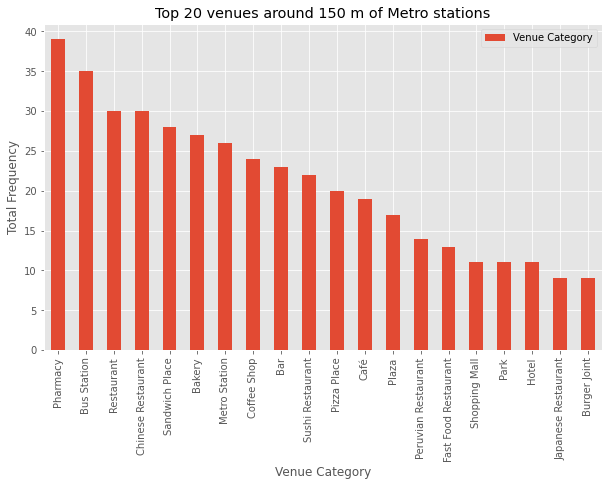

In [26]:
Metro_chart.head(20).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Venue Category')
plt.ylabel('Total Frequency')
plt.title('Top 20 venues around 150 m of Metro stations')
plt.show()

Let´s take away some venues that are not businessess

In [27]:
Metro_chart.drop(['Bus Station', 'Metro Station', 'Plaza', 'Park'], inplace = True)
Metro_chart.head()

,Venue Category
Pharmacy,39
Restaurant,30
Chinese Restaurant,30
Sandwich Place,28
Bakery,27


Make again the chart

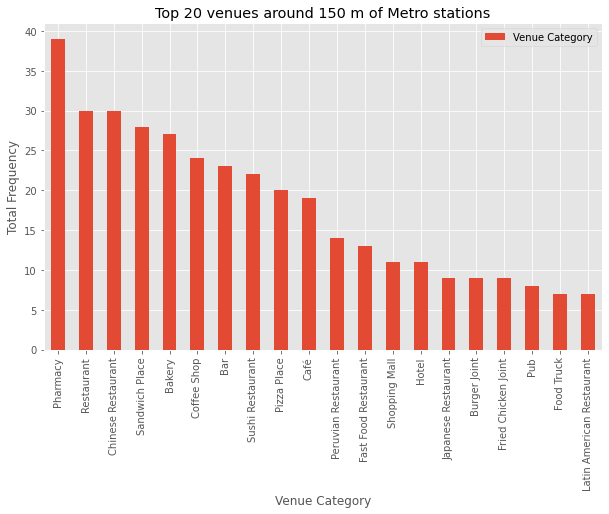

In [28]:
Metro_chart.head(20).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Venue Category')
plt.ylabel('Total Frequency')
plt.title('Top 20 venues around 150 m of Metro stations')
plt.show()

Ok, we have the info for the Metro stations nearby commerce, now let's obtain the NYC subway info:

In [29]:
NYC_venues = getNearbyVenues(names=df_NYC['Stop Name'],
                                   latitudes=df_NYC['GTFS Latitude'],
                                   longitudes=df_NYC['GTFS Longitude']
                                  )

In [30]:
print('We found a total of', NYC_venues.shape[0], 'venues around NYC subway stations')

We found a total of 6375 venues around NYC subway stations


Let's search for the most frequent NYC venues in total (without the same venues that we droped from the Metro dataframe)

In [31]:
NYC_chart = pd.DataFrame(NYC_venues['Venue Category'].value_counts())
NYC_chart.drop(['Bus Station', 'Metro Station', 'Plaza', 'Park'], inplace = True) # drop same venues

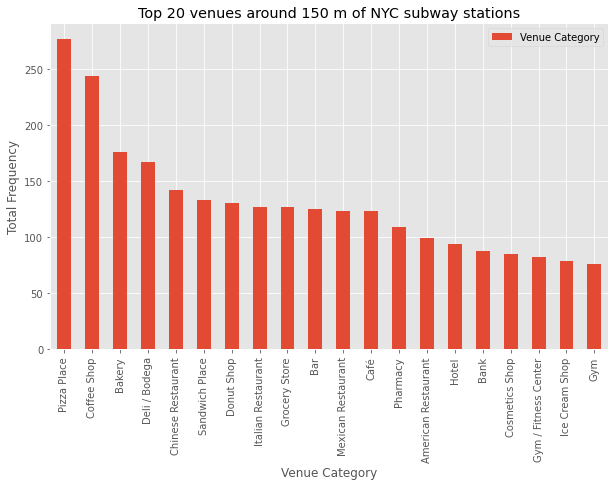

In [32]:
NYC_chart.head(20).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Venue Category')
plt.ylabel('Total Frequency')
plt.title('Top 20 venues around 150 m of NYC subway stations')
plt.show()

It seems that in Metro de Santiago we have a lack of Pizza places in the sorroundings compared with NYC. Let's find out in which kind of places are those NYC subway stations with pizza places in the nears.

In [33]:
# NYC stations with pizza places at 150 m radius.
NYC_top_venue = NYC_venues[NYC_venues['Venue Category'] == 'Pizza Place']
NYC_top_venue.head()

,Station,Station Latitude,Station Longitude,Venue ID,Venue Name,Venue Latitude,Venue Longitude,Venue Category
23,Astoria-Ditmars Blvd,40.775036,-73.912034,4b51fec8f964a5200a6027e3,Michael Angelo's Pizza,40.774775,-73.913402,Pizza Place
31,Astoria-Ditmars Blvd,40.775036,-73.912034,5de43e7e29a3570008dd0f49,The Yard,40.774847,-73.913308,Pizza Place
55,30 Av,40.766779,-73.921479,5541a608498ecffd52f91dfc,Astoria Pizza,40.766490,-73.920423,Pizza Place
94,Broadway,40.761820,-73.925508,54cac33d498e42f1c384fb01,P.S. Pizza,40.761583,-73.924583,Pizza Place
97,Broadway,40.761820,-73.925508,4b679046f964a5206a552be3,Dino's Pizza & Pasta,40.762398,-73.925989,Pizza Place


Ok, let's see, where those Pizza places are located

In [34]:
map_nyc = folium.Map(location=[NYClatitude, NYClongitude], zoom_start=11)

# add markers of pizza places to map
for lat, lon, name in zip(NYC_top_venue['Venue Latitude'], NYC_top_venue['Venue Longitude'], NYC_top_venue['Venue Name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nyc)  
    
map_nyc

Oops, looks like everywhere is a Pizza place in NYC!. They're not located preferently in some specific boroughs.

Let's see where are located the few Metro pizza places.

In [35]:
# Metro stations with pizza places at 150 m radius.
Metro_pizza_venue = Metro_venues[Metro_venues['Venue Category'] == 'Pizza Place']
Metro_pizza_venue.head()

,Station,Station Latitude,Station Longitude,Venue ID,Venue Name,Venue Latitude,Venue Longitude,Venue Category
34,RICARDO CUMMING,-33.438779,-70.664495,4c15929977cea5936a7fd260,Pizzas a La Piedra Benvenutto,-33.439290,-70.664703,Pizza Place
40,PILA DEL GANSO,-33.454256,-70.692291,5963f11d813488243d205a9b,Little Caesars Pizza,-33.454383,-70.691868,Pizza Place
41,PILA DEL GANSO,-33.454256,-70.692291,59f3d0b06c08d16511147091,Papa John’s,-33.453789,-70.691787,Pizza Place
64,ESTACION CENTRAL,-33.450894,-70.679965,4da483467ccc816e3867937b,Pizza Hut,-33.452204,-70.679861,Pizza Place
71,REPUBLICA,-33.446896,-70.664245,4b6b0235f964a5204fec2be3,Papalino's Pizza,-33.446922,-70.662667,Pizza Place


In [36]:
Metro_pizza_venue.shape

(20, 8)

We have only 20 Pizzeria near the Metro stations!. Let's see them in a map.

In [37]:
map_santiago = folium.Map(location=[Stgolatitude, Stgolongitude], zoom_start=11)

# add markers of pizza places to map
for lat, lon, name in zip(Metro_pizza_venue['Venue Latitude'], Metro_pizza_venue['Venue Longitude'], Metro_pizza_venue['Venue Name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_santiago)  
    
map_santiago

Let's rank them considering the rating that the Foursquare users gave them.

We will have to obtain the details of each of this 20 pizza venues.

In [38]:
Metro_pizza_venue.reset_index(inplace = True)
Metro_pizza_venue.drop(['index'], axis = 1, inplace = True)
Metro_pizza_venue

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Station,Station Latitude,Station Longitude,Venue ID,Venue Name,Venue Latitude,Venue Longitude,Venue Category
0,RICARDO CUMMING,-33.438779,-70.664495,4c15929977cea5936a7fd260,Pizzas a La Piedra Benvenutto,-33.439290,-70.664703,Pizza Place
1,PILA DEL GANSO,-33.454256,-70.692291,5963f11d813488243d205a9b,Little Caesars Pizza,-33.454383,-70.691868,Pizza Place
2,PILA DEL GANSO,-33.454256,-70.692291,59f3d0b06c08d16511147091,Papa John’s,-33.453789,-70.691787,Pizza Place
3,ESTACION CENTRAL,-33.450894,-70.679965,4da483467ccc816e3867937b,Pizza Hut,-33.452204,-70.679861,Pizza Place
4,REPUBLICA,-33.446896,-70.664245,4b6b0235f964a5204fec2be3,Papalino's Pizza,-33.446922,-70.662667,Pizza Place
5,BELLAS ARTES,-33.436299,-70.643274,4b69aa48f964a52020ac2be3,Pizzería Verace,-33.436691,-70.643457,Pizza Place
6,SANTA LUCIA,-33.442985,-70.646459,4bc4af26920eb713ee191f2c,Da Dino,-33.442810,-70.646727,Pizza Place
7,DEPARTAMENTAL,-33.503434,-70.654956,52213a9011d202a823354e0c,Pizzeria Fugazza (nueva),-33.503033,-70.654843,Pizza Place
8,DEPARTAMENTAL,-33.503434,-70.654956,4f9f41d6e4b0aa6a18911c9c,Fugazza,-33.502756,-70.654875,Pizza Place
9,SANTA ISABEL,-33.447152,-70.630264,58acd56a9900e670e34bd157,Peyuco,-33.447303,-70.631404,Pizza Place


Let's consider that we want our Pizzeria near the Metro station where there is actually the most voted pizza place. We suppose that as more votes, more people, so, more clients for our pizzeria.

In [39]:
# Dataframe to receive the rating signals received by the 20 pizzerias
ratings = pd.DataFrame(columns = ('Nombre', 'Rating signals'))
ratings

,Nombre,Rating signals


Let's obtain the rating signals received for each pizza place from Foursquare. We will use the venue id for each call.

In [40]:
for i in range(Metro_pizza_venue.shape[0]-1):
    ID = Metro_pizza_venue.iloc[i, 3]
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
    ID, 
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
    result = requests.get(url).json()
    nombre = result['response']['venue']['name']
    rating = result['response']['venue']['ratingSignals']
    ratings = ratings.append({'Nombre': nombre, 'Rating signals': rating}, ignore_index = True)

Now, let's take a look at the results in descending order

In [41]:
ratings.sort_values('Rating signals', ascending = False).head()

,Nombre,Rating signals
5,Pizzería Verace,346
6,Da Dino,283
11,Voraz Pizza,138
17,Da Cesare&Paolo Pizzeria Ristorante,118
16,Papa John's,71


Pizzería Verace is the most rated venue. Let's see where it is located.

In [42]:
Metro_pizza_venue[Metro_pizza_venue['Venue Name'] == 'Pizzería Verace']

,Station,Station Latitude,Station Longitude,Venue ID,Venue Name,Venue Latitude,Venue Longitude,Venue Category
5,BELLAS ARTES,-33.436299,-70.643274,4b69aa48f964a52020ac2be3,Pizzería Verace,-33.436691,-70.643457,Pizza Place


Pizzería Verace is at the nears of the Bellas Artes Station. So, this is the place for the first Pizza place.

Finally, let's see in the map the surroundings of station Bellas Artes:

In [43]:
# create map of Santiago using latitude and longitude values
lat = Metro_pizza_venue.loc[5, 'Station Latitude']
long = Metro_pizza_venue.loc[5, 'Station Longitude']
name = Metro_pizza_venue.loc[5, 'Station']
map_santiago = folium.Map(location=[lat, long], zoom_start=18)

# add marker to map
folium.CircleMarker([lat, long],
        radius=150,
        popup=name,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.2,
        parse_html=False).add_to(map_santiago)  
    
map_santiago

This red circle, with a radius of 150 m, defines the area where to put the first pizza place. Subsequents pizzerías should be near the other pizzerias in the order of the rating signals dataframe.

# The End